# **World Air Quality Index by City and Coordinates**

# Description

# Objective of this Notebook

# **1.Import  Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# **2.Dataset Loading and Inspecting data**

# 2.1. Loading Dataset

In [3]:
AQI_data = pd.read_csv(r"D:\Data Science\AQI.csv")

In [7]:
AQI_data

Country              City  AQI Value AQI Category  \
0            Russian Federation        Praskoveya         51     Moderate   
1                        Brazil  Presidente Dutra         41         Good   
2                        Brazil  Presidente Dutra         41         Good   
3                         Italy   Priolo Gargallo         66     Moderate   
4                        Poland         Przasnysz         34         Good   
...                         ...               ...        ...          ...   
16690  United States of America  Highland Springs         54     Moderate   
16691                  Slovakia            Martin         71     Moderate   
16692                  Slovakia            Martin         71     Moderate   
16693                    France            Sceaux         50         Good   
16694  United States of America       Westerville         71     Moderate   

       CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category  \
0                 1            Good               36               Good   
1                 1            Good                5               Good   
2                 1            Good                5               Good   
3                 1            Good               39               Good   
4                 1            Good               34               Good   
...             ...             ...              ...                ...   
16690             1            Good               34               Good   
16691             1            Good               39               Good   
16692             1            Good               39               Good   
16693             1            Good               20               Good   
16694             1            Good               44               Good   

       NO2 AQI Value NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  \
0                  0             Good               51           Moderate   
1                  1             Good               41               Good   
2                  1             Good               41               Good   
3                  2             Good               66           Moderate   
4                  0             Good               20               Good   
...              ...              ...              ...                ...   
16690              5             Good               54           Moderate   
16691              1             Good               71           Moderate   
16692              1             Good               71           Moderate   
16693              5             Good               50               Good   
16694              2             Good               71           Moderate   

           lat      lng  
0      44.7444  44.2031  
1      -5.2900 -44.4900  
2     -11.2958 -41.9869  
3      37.1667  15.1833  
4      53.0167  20.8833  
...        ...      ...  
16690  37.5516 -77.3285  
16691  49.0650  18.9219  
16692  36.3385 -88.8513  
16693  48.7786   2.2906  
16694  40.1241 -82.9210  

[16695 rows x 14 columns]

The dataset comprises 16,695 records spanning 14 distinct variables.

# 2.2. Initial Data Inspection

In [219]:
AQI_data.head()

Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2              Brazil  Presidente Dutra         41         Good             1   
3               Italy   Priolo Gargallo         66     Moderate             1   
4              Poland         Przasnysz         34         Good             1   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good                5               Good              1   
3            Good               39               Good              2   
4            Good               34               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category      lat      lng  
0             Good               51           Moderate  44.7444  44.2031  
1             Good               41               Good  -5.2900 -44.4900  
2             Good               41               Good -11.2958 -41.9869  
3             Good               66           Moderate  37.1667  15.1833  
4             Good               20               Good  53.0167  20.8833

In [223]:
AQI_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


* Country: The country to which the data belongs.
* City: The specific city within the country.
* AQI value: The overall Air Quality Index (AQI) value, representing the combined impact of multiple air pollutants.
* AQI category: The category or level associated with the overall AQI value, indicating the degree of air quality (e.g., Good, Moderate, Unhealthy).
* CO AQI value: The AQI value specifically for Carbon Monoxide (CO) concentration.
* CO AQI category: The category associated with the CO AQI value.
* Ozone AQI value: The AQI value specifically for Ozone concentration.
* Ozone AQI category: The category associated with the Ozone AQI value.
* NO2 AQI value: The AQI value specifically for Nitrogen Dioxide (NO2) concentration.
* NO2 AQI category: The category associated with the NO2 AQI value.
* PM2.5 AQI value: The AQI value specifically for Particulate Matter (PM2.5) concentration.
* PM2.5 AQI category: The category associated with the PM2.5 AQI value.
* lat: The latitude coordinate of the city.
* lng: The longitude coordinate of the city.

In [104]:
AQI_data.shape

(16695, 14)

# Observations:
The shape of this dataframe is (16695,14)

In [105]:
AQI_data.describe()

AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  16695.000000  16695.000000     16695.000000   16695.000000   
mean      62.998682      1.342138        31.767355       3.819647   
std       43.091971      2.371379        22.839343       5.880677   
min        7.000000      0.000000         0.000000       0.000000   
25%       38.500000      1.000000        20.000000       0.000000   
50%       52.000000      1.000000        29.000000       2.000000   
75%       69.000000      1.000000        38.000000       5.000000   
max      500.000000    133.000000       222.000000      91.000000   

       PM2.5 AQI Value           lat           lng  
count     16695.000000  16695.000000  16695.000000  
mean         59.821324     30.267148     -3.944485  
std          43.208298     22.947398     73.037148  
min           0.000000    -54.801900   -171.750000  
25%          34.000000     16.515450    -75.180000  
50%          52.000000     38.815800      5.643100  
75%          69.000000     46.683300     36.275000  
max         500.000000     70.767000    178.017800

# 2.3.Handling Missing Values

In [225]:
AQI_data.isna().sum()

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

In [243]:
AQI_data[AQI_data.isnull().any(axis=1)]

Country       City  AQI Value AQI Category  CO AQI Value  \
385       NaN  Granville         30         Good             1   
560       NaN  Kingstown        163    Unhealthy             0   
623       NaN   Nanakuli         30         Good             0   
629       NaN    Lavagna         55     Moderate             1   
664       NaN  Ladispoli         48         Good             1   
...       ...        ...        ...          ...           ...   
16267     NaN   Tiverton         32         Good             1   
16279     NaN   Sorrento         61     Moderate             1   
16456     NaN       Bima         25         Good             1   
16594     NaN  Marapanim         25         Good             1   
16618     NaN    Calbuco         36         Good             1   

      CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
385              Good               30               Good              3   
560              Good               25               Good              0   
623              Good               27               Good              0   
629              Good               38               Good              2   
664              Good               48               Good              2   
...               ...              ...                ...            ...   
16267            Good               24               Good              7   
16279            Good               45               Good              3   
16456            Good               25               Good              0   
16594            Good               15               Good              0   
16618            Good               15               Good              3   

      NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category      lat       lng  
385               Good               25               Good  48.8381   -1.5869  
560               Good              163          Unhealthy  13.1578  -61.2250  
623               Good               30               Good  21.3892 -158.1445  
629               Good               55           Moderate  44.3167    9.3333  
664               Good               34               Good  41.9544   12.0742  
...                ...              ...                ...      ...       ...  
16267             Good               32               Good  41.6090  -71.1741  
16279             Good               61           Moderate  40.6278   14.3736  
16456             Good               24               Good  -8.4600  118.7267  
16594             Good               25               Good  -0.7139  -47.6939  
16618             Good               36               Good -41.7667  -73.1333  

[302 rows x 14 columns]

In [245]:
AQI_data.dropna(inplace = True)

In [247]:
AQI_data.isna().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
lat                   0
lng                   0
dtype: int64

# 2.4. Handling Duplicates 

In [111]:
#Displaying the duplicate values in the column 'City'
AQI_data.duplicated(subset='City').sum()

2466

In [112]:
AQI_data[AQI_data.duplicated(subset=['City'])]

City  AQI Value AQI Category  CO AQI Value CO AQI Category  \
2      Presidente Dutra         41         Good             1            Good   
6           Punta Gorda         54     Moderate             1            Good   
21              Pontiac         77     Moderate             2            Good   
34               Dayton         45         Good             1            Good   
35               Dayton         45         Good             1            Good   
...                 ...        ...          ...           ...             ...   
16647            Salina         51     Moderate             1            Good   
16672             Union         51     Moderate             1            Good   
16673             Union         51     Moderate             1            Good   
16685           Viterbo         55     Moderate             1            Good   
16692            Martin         71     Moderate             1            Good   

       Ozone AQI Value Ozone AQI Category  NO2 AQI Value NO2 AQI Category  \
2                    5               Good              1             Good   
6                   14               Good             11             Good   
21                  22               Good             15             Good   
34                  32               Good              7             Good   
35                  32               Good              7             Good   
...                ...                ...            ...              ...   
16647               34               Good              1             Good   
16672               47               Good              2             Good   
16673               47               Good              2             Good   
16685               24               Good              0             Good   
16692               39               Good              1             Good   

       PM2.5 AQI Value PM2.5 AQI Category      lat       lng  
2                   41               Good -11.2958  -41.9869  
6                   54           Moderate  26.8941  -82.0513  
21                  77           Moderate  40.8894  -88.6409  
34                  45               Good  39.2592 -119.5653  
35                  45               Good  30.0315  -94.9158  
...                ...                ...      ...       ...  
16647               51           Moderate  43.1023  -76.1768  
16672               51           Moderate  42.1258  -76.0329  
16673               51           Moderate  38.4399  -90.9927  
16685               55           Moderate   5.0667  -75.8833  
16692               71           Moderate  36.3385  -88.8513  

[2466 rows x 13 columns]

In [113]:
# Since there are duplicate rows with same city names and values, we can remove it 
AQI_data.drop_duplicates(subset='City', inplace=True)

In [114]:
# Reset index
AQI_data.reset_index(drop=True, inplace=True)
AQI_data

City  AQI Value AQI Category  CO AQI Value CO AQI Category  \
0            Praskoveya         51     Moderate             1            Good   
1      Presidente Dutra         41         Good             1            Good   
2       Priolo Gargallo         66     Moderate             1            Good   
3             Przasnysz         34         Good             1            Good   
4           Punta Gorda         54     Moderate             1            Good   
...                 ...        ...          ...           ...             ...   
14224          Shaoguan        160    Unhealthy             3            Good   
14225  Highland Springs         54     Moderate             1            Good   
14226            Martin         71     Moderate             1            Good   
14227            Sceaux         50         Good             1            Good   
14228       Westerville         71     Moderate             1            Good   

       Ozone AQI Value Ozone AQI Category  NO2 AQI Value NO2 AQI Category  \
0                   36               Good              0             Good   
1                    5               Good              1             Good   
2                   39               Good              2             Good   
3                   34               Good              0             Good   
4                   14               Good             11             Good   
...                ...                ...            ...              ...   
14224              160          Unhealthy              1             Good   
14225               34               Good              5             Good   
14226               39               Good              1             Good   
14227               20               Good              5             Good   
14228               44               Good              2             Good   

       PM2.5 AQI Value PM2.5 AQI Category      lat       lng  
0                   51           Moderate  44.7444   44.2031  
1                   41               Good  -5.2900  -44.4900  
2                   66           Moderate  37.1667   15.1833  
3                   20               Good  53.0167   20.8833  
4                   54           Moderate  16.1005  -88.8074  
...                ...                ...      ...       ...  
14224               79           Moderate  24.8011  113.5927  
14225               54           Moderate  37.5516  -77.3285  
14226               71           Moderate  49.0650   18.9219  
14227               50               Good  48.7786    2.2906  
14228               71           Moderate  40.1241  -82.9210  

[14229 rows x 13 columns]

# 2.5. Value Counts for each category

In [148]:
print('AQI Category')
print(AQI_data['AQI Category'].value_counts())
print('\nNo2 AQI Categories')
print(AQI_data['NO2 AQI Category'].value_counts())
print('\nCO AQI Categories')
print(AQI_data['CO AQI Category'].value_counts())
print('\nPM2.5 AQI Categories')
print(AQI_data['PM2.5 AQI Category'].value_counts())
print('\nOzone AQI Categories')
print(AQI_data['Ozone AQI Category'].value_counts())

AQI Category
AQI Category
Good                              6670
Moderate                          5872
Unhealthy                          773
Unhealthy for Sensitive Groups     745
Very Unhealthy                     120
Hazardous                           49
Name: count, dtype: int64

No2 AQI Categories
NO2 AQI Category
Good        14220
Moderate        9
Name: count, dtype: int64

CO AQI Categories
CO AQI Category
Good                              14227
Unhealthy for Sensitive Groups        1
Moderate                              1
Name: count, dtype: int64

PM2.5 AQI Categories
PM2.5 AQI Category
Good                              6871
Moderate                          5723
Unhealthy for Sensitive Groups     756
Unhealthy                          734
Very Unhealthy                     102
Hazardous                           43
Name: count, dtype: int64

Ozone AQI Categories
Ozone AQI Category
Good                              13159
Moderate                            743
Unhealthy fo

# **3.Exploratory Data Analysis**

# 3.1 Univariate Analysis

# 3.1.1.AQI Category Distribution

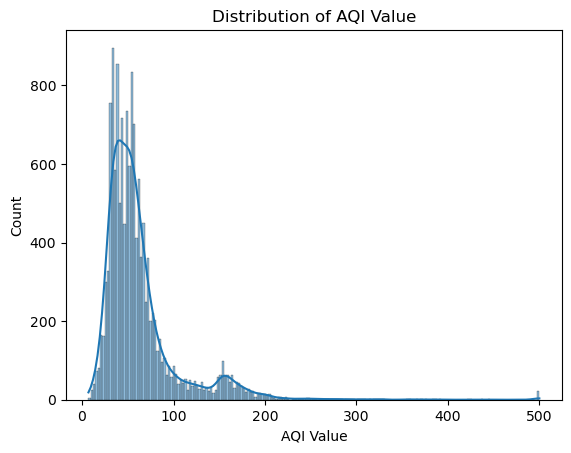

In [140]:
sns.histplot(AQI_data['AQI Value'], kde=True)
plt.title('Distribution of AQI Value')
plt.xlabel('AQI Value')
plt.show()

 # Insights:
The histogram shows a peak between 0 and 100 AQI values, indicating that most of the air quality measurements fall within the "Good" to "Moderate" air quality categories.

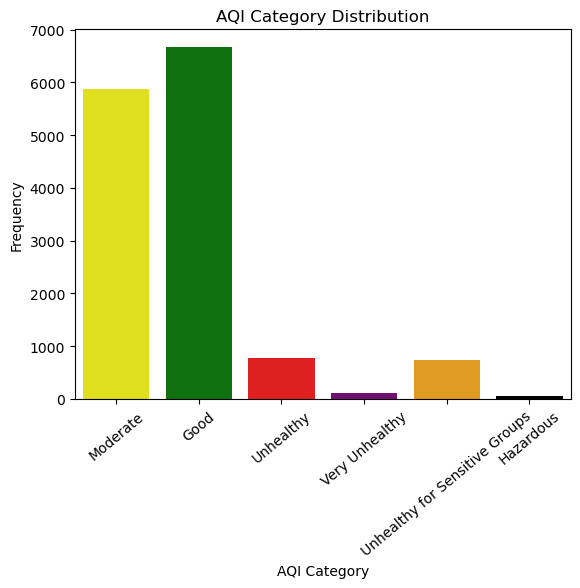

In [142]:

color_sequence = ["yellow", "green", "red", "purple","orange", "black"]
sns.countplot(x = "AQI Category", data = AQI_data, palette = color_sequence)
plt.xlabel("AQI Category")
plt.ylabel("Frequency")
plt.title("AQI Category Distribution")
plt.xticks(rotation = 40)
plt.show()

# Insight: 
* The "Good" category has the highest frequency, with over 6,500 instances, followed by the "Moderate" category with around 5,900 instances. 
* This suggests that the majority of AQI values fall within the "Good" to "Moderate" ranges, indicating generally acceptable air quality for most people.

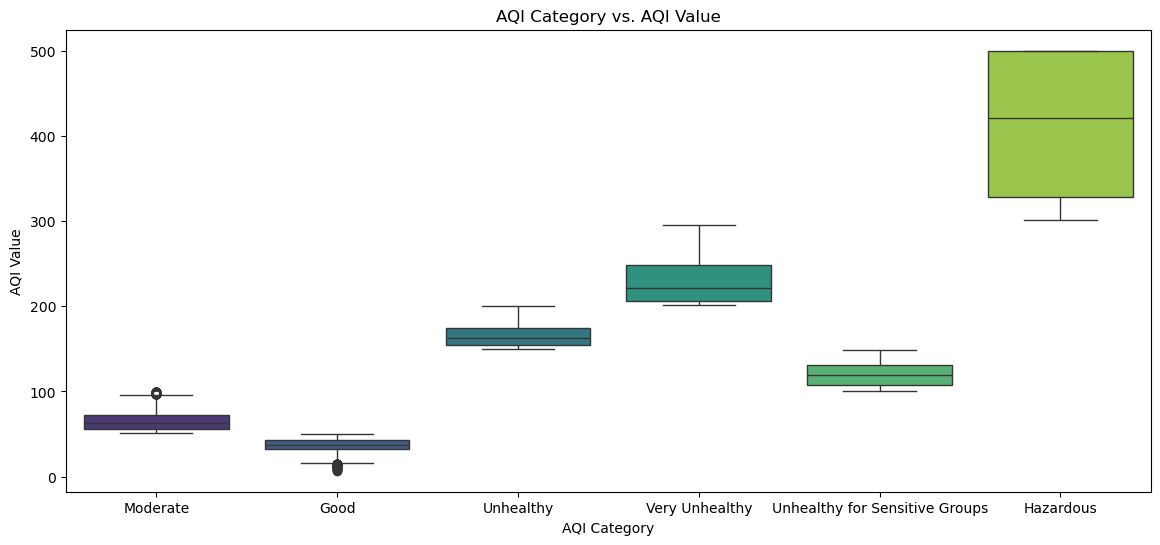

In [177]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=AQI_data, x='AQI Category', y='AQI Value',palette = "viridis")
plt.title('AQI Category vs. AQI Value')
plt.xlabel('AQI Category')
plt.ylabel('AQI Value')
plt.show()

# Insights:
* The "Good" AQI category likely exhibits a narrow box with the median close to the lower end (under 50), indicating that the AQI values for this category are concentrated at the lower end of the scale, representing better air quality.
* The "Hazardous" AQI category will likely have a much broader range, potentially extending far beyond the typical AQI scale, indicating a higher spread and more extreme values. This shows that the air quality in this category is highly variable and dangerous for all individuals.

# 3.2.Bivariate Analysis

# 3.2.1. Comparison of AQI Values by Pollutants

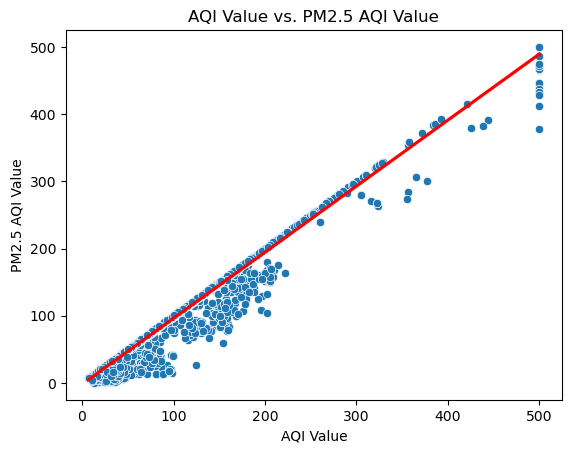

In [9]:
sns.regplot(data=AQI_data, x='AQI Value', y='PM2.5 AQI Value', scatter_kws={'s': 10}, line_kws={'color': 'red'})
sns.scatterplot(data=AQI_data, x='AQI Value', y='PM2.5 AQI Value')
plt.title('AQI Value vs. PM2.5 AQI Value')
plt.xlabel('AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.show()

# Insights:
* The scatter plot with the red regression line reveals the relationship between AQI values and PM2.5 AQI values, indicating a potential positive correlation, where higher AQI values tend to coincide with higher PM2.5 levels.
* The addition of the regression line enhances the understanding of the relationship, making it easier to identify the overall direction of the data and any potential outliers or deviations from the expected trend.

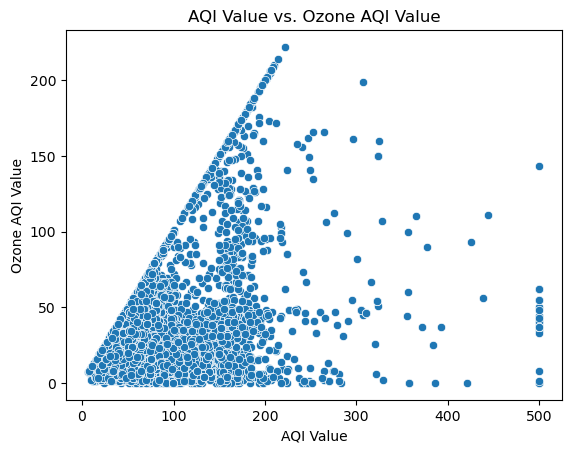

In [13]:
sns.scatterplot(data=AQI_data, x='AQI Value', y='Ozone AQI Value')
plt.title('AQI Value vs. Ozone AQI Value')
plt.xlabel('AQI Value')
plt.ylabel('Ozone AQI Value')
plt.show()

# Insights:
* The spread of points across the plot could reveal variations in how ozone levels contribute to the AQI. 
* Certain regions may show more significant ozone-related air pollution, while others may have less of an impact on AQI, indicating the complex nature of air quality metrics.

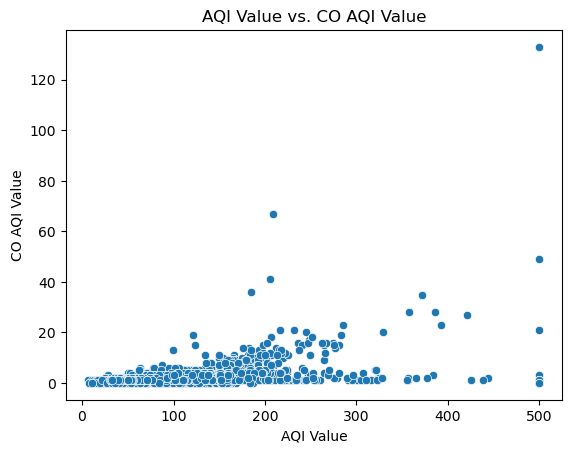

In [167]:
sns.scatterplot(data=AQI_data, x='AQI Value', y='CO AQI Value',palette = "viridis")
plt.title('AQI Value vs. CO AQI Value')
plt.xlabel('AQI Value')
plt.ylabel('CO AQI Value')
plt.show()

# Insights:
* The plot may show a potential positive or weak correlation between the overall AQI and the CO AQI values. 
* High AQI values could potentially align with higher CO AQI values, suggesting that areas with higher overall pollution levels might also experience elevated carbon monoxide concentrations.

# 3.3 Map distributions of each category

Text(0, 0.5, 'Latitude')

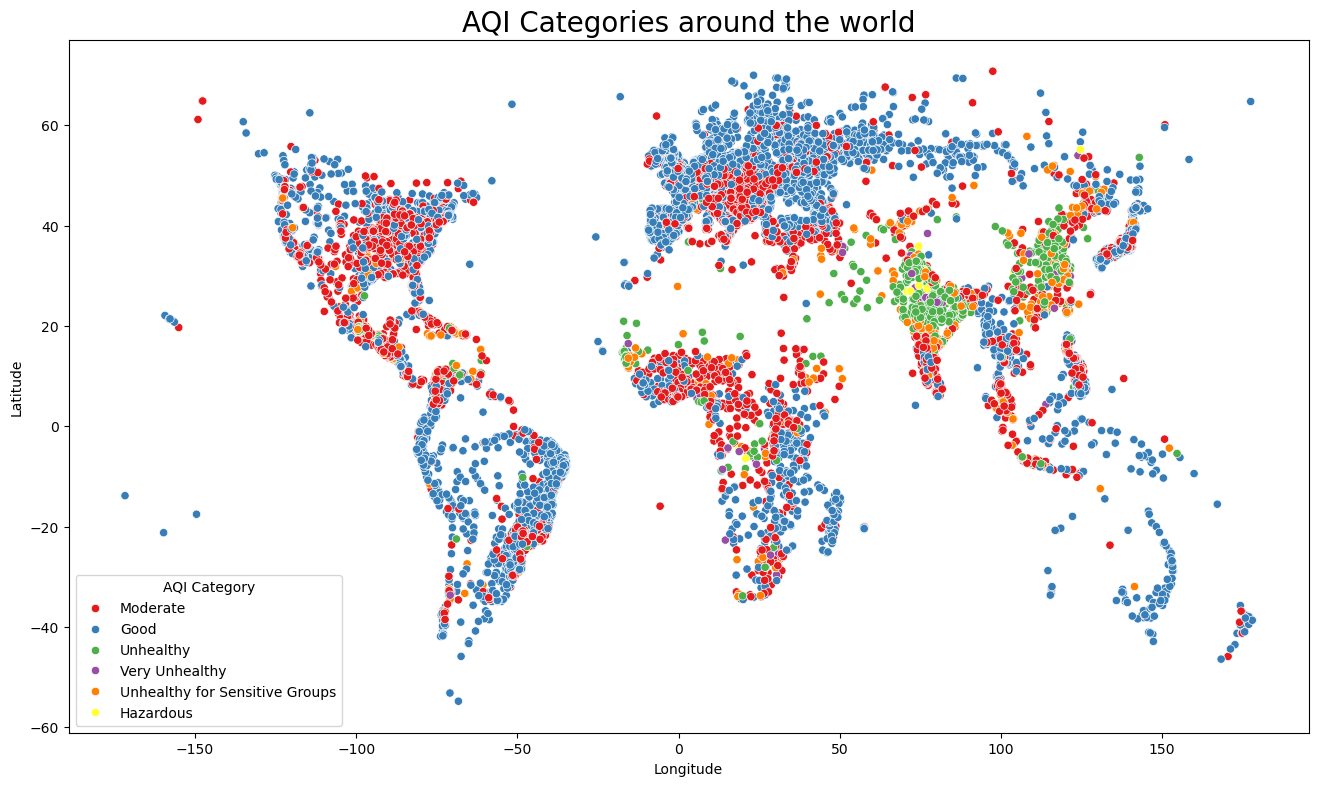

In [182]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=AQI_data,x='lng',y='lat',hue='AQI Category',palette='Set1')
plt.title('AQI Categories around the world',fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Insights:
* The scatter plot reveals a geographical distribution of AQI (Air Quality Index) categories across the world, with color-coded points representing different AQI levels. 
* It suggests that certain regions, particularly urban and industrialized areas, experience higher AQI values, indicating poorer air quality, while others, such as remote or less developed areas, show relatively cleaner air.

# PM2.5 AQI Category

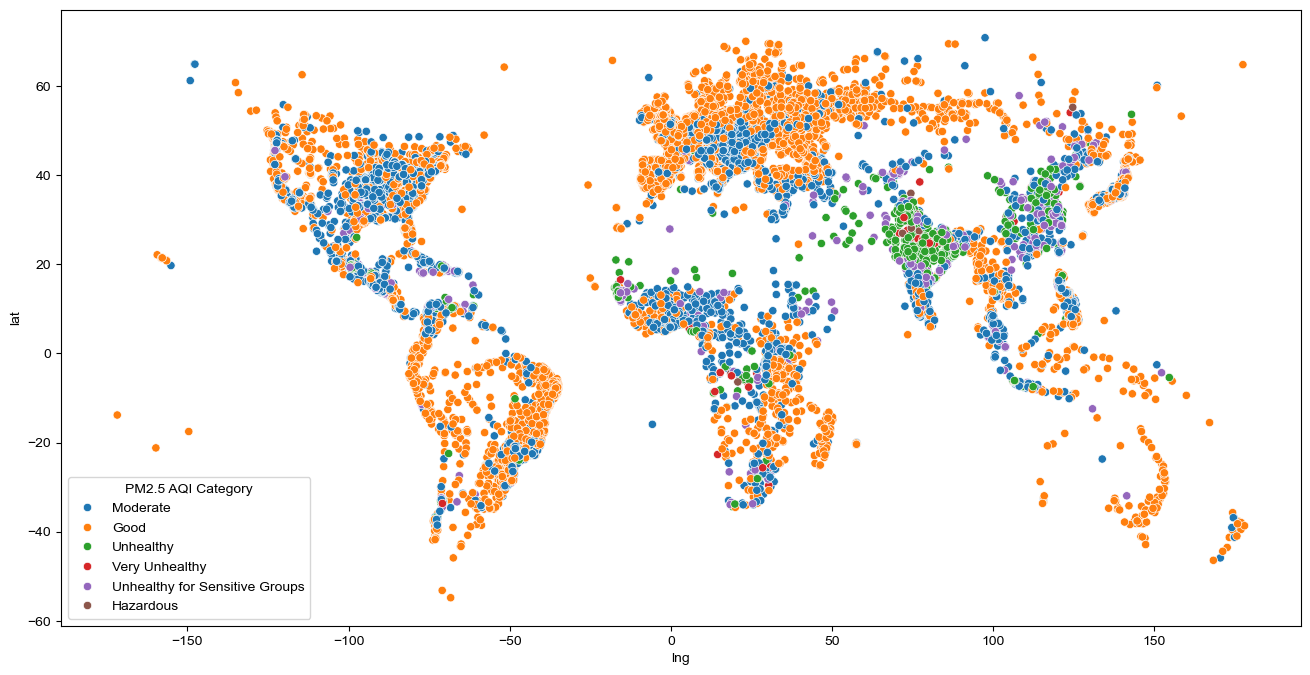

In [184]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=AQI_data, x='lng', y='lat', hue='PM2.5 AQI Category')
sns.set(style="darkgrid")
plt.show()

# Insights:
* The plot highlights regions with varying levels of PM2.5 pollution, with urban areas and industrial zones likely showing higher concentrations of PM2.5, indicating poorer air quality, while rural and less developed areas may display lower values, suggesting cleaner air.

# CO AQI Category

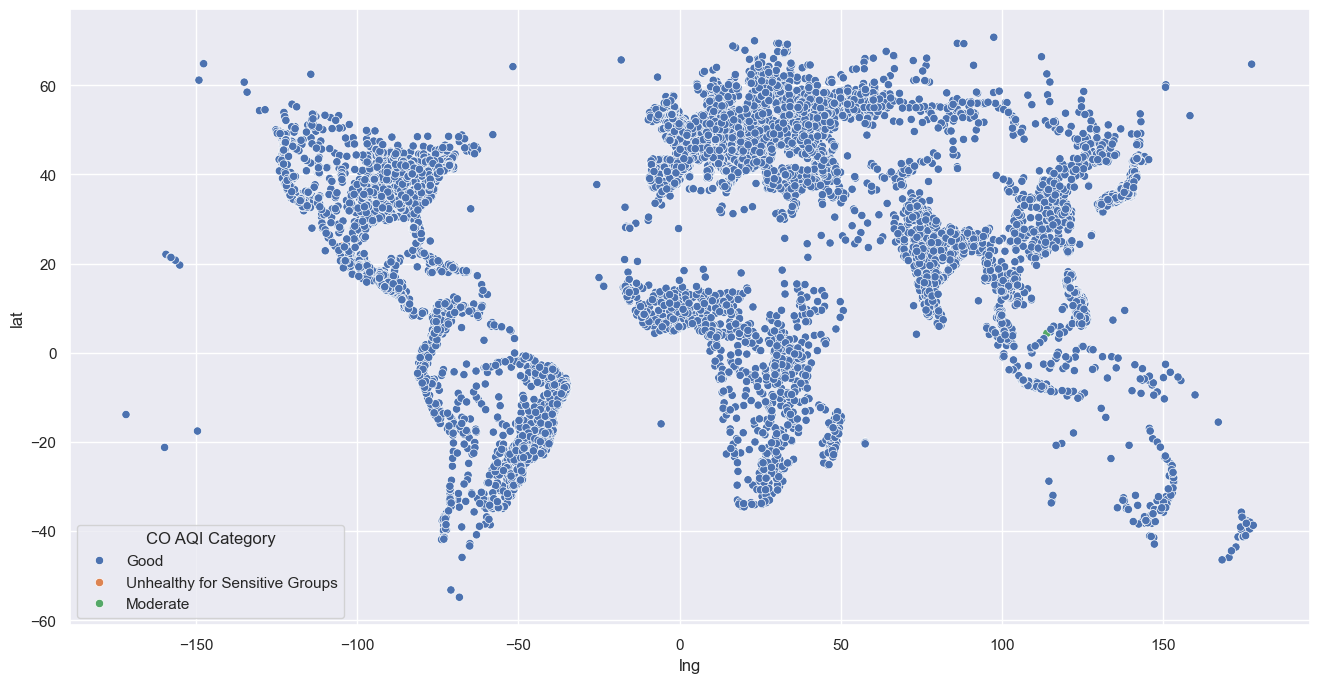

In [186]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=AQI_data, x='lng', y='lat', hue='CO AQI Category')
sns.set(style="darkgrid")
plt.show()

 # Insights: 
 By analyzing the spread and clustering of points, we can identify regions with higher or lower CO AQI levels. This may reveal urban areas or industrial zones where CO pollution is more concentrated, or rural regions with better air quality.

# Ozone AQI Category

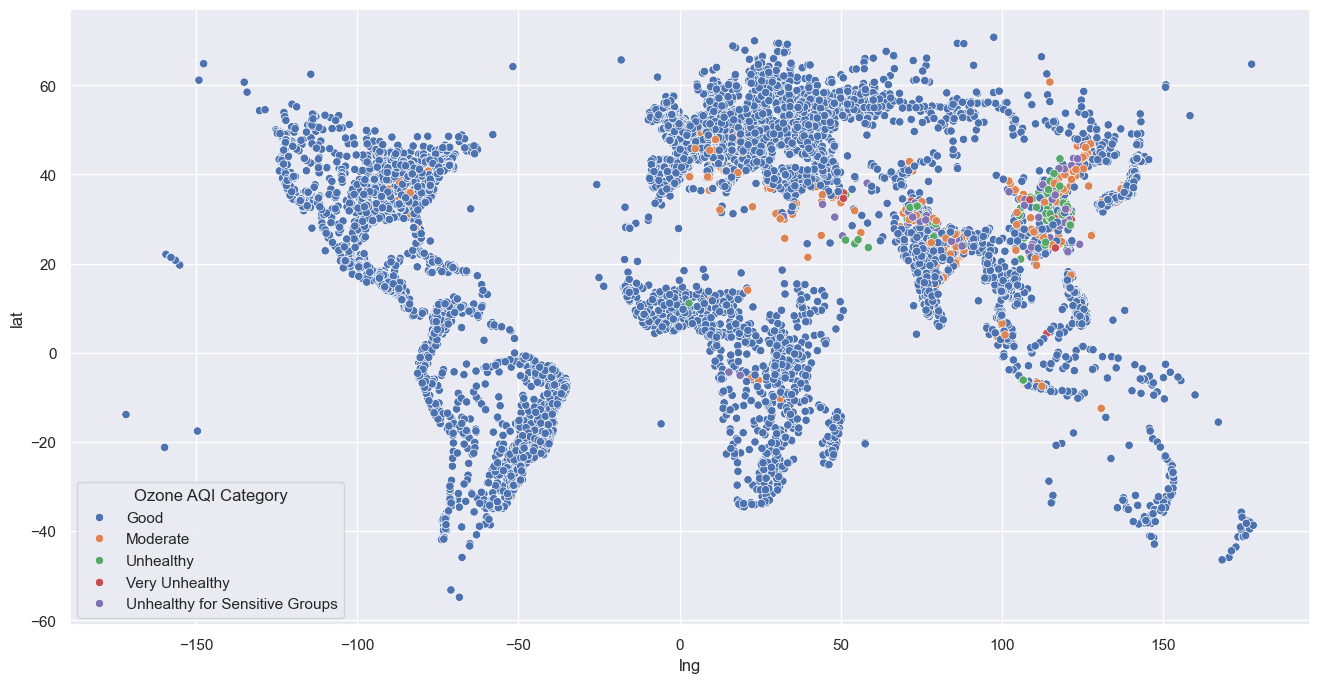

In [190]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=AQI_data, x='lng', y='lat', hue='Ozone AQI Category')
sns.set(style="darkgrid")
plt.show()

# Insights:
* By observing the spread of points and their color variations, the plot allows for the identification of specific areas where ozone pollution is more concentrated. 
* Urban areas, industrial zones, or regions with heavy traffic may show higher levels of ozone pollution, while rural or less populated areas may display lower ozone concentrations.

# NO2 AQI Category

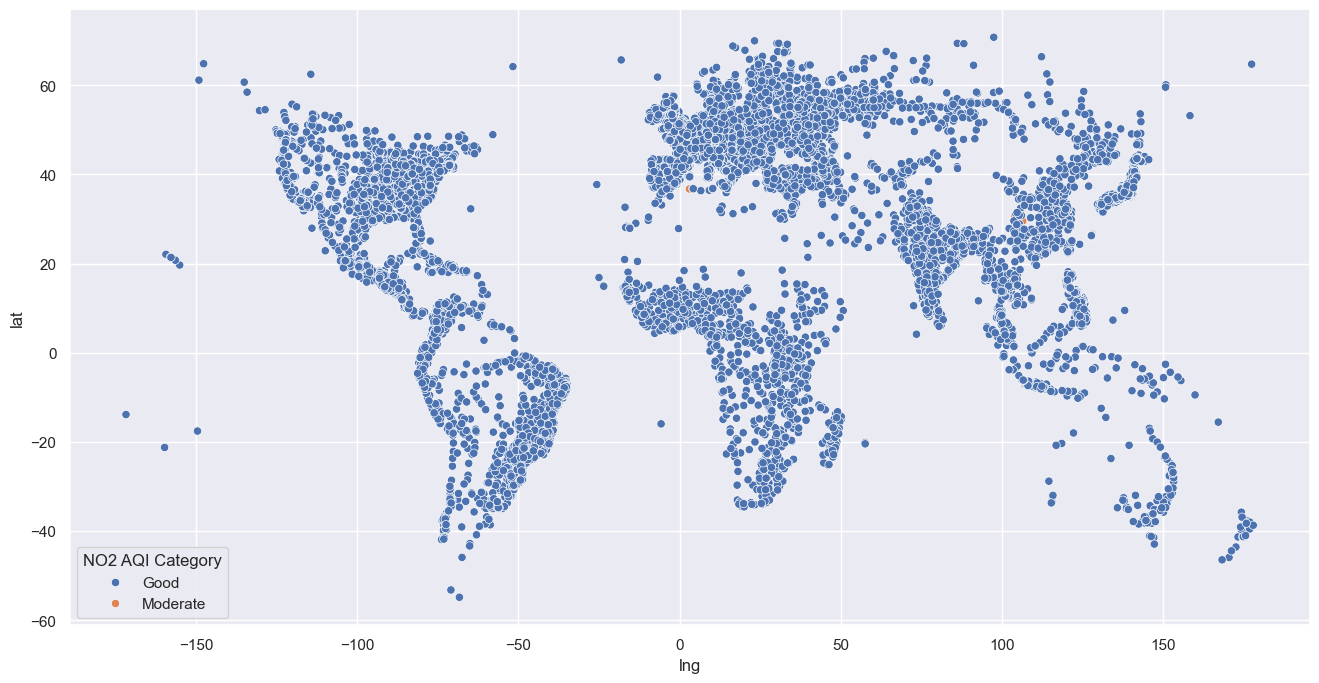

In [194]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=AQI_data, x='lng', y='lat', hue='NO2 AQI Category')
sns.set(style="darkgrid")
plt.show()

# Insights:
* The scatter plot visualizes how the NO2 Air Quality Index (AQI) varies across different geographical locations (latitude and longitude).
* By coloring the points based on the 'NO2 AQI Category', one can infer areas with better or worse air quality, which helps identify locations affected by higher nitrogen dioxide pollution.

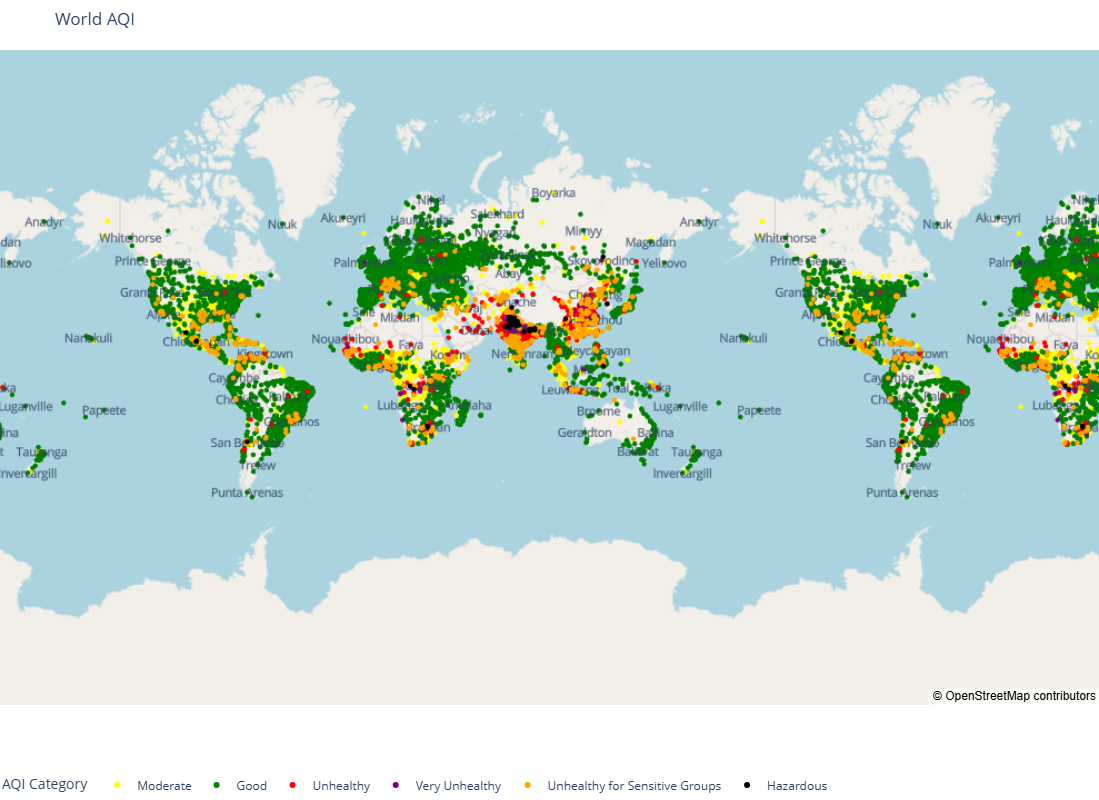

In [201]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
fig = px.scatter_mapbox(AQI_data,
                        lon=AQI_data['lng'],
                        lat=AQI_data['lat'],
                        hover_name="AQI Value",
                        zoom=1,
                        color=AQI_data['AQI Category'],
                        text=AQI_data['City'],
                        width=1200,
                        height=800,
                        title='World AQI',
                        color_discrete_sequence=["yellow", "green", "red", "purple", "orange", "black"])
fig.update_layout(
    mapbox_style="open-street-map",  
    legend=dict(orientation="h"), 
    margin={"r": 0, "t": 50, "l": 0, "b": 10},  
)
fig.show()

# Insights:
* The map uses different colors (yellow, green, red, purple, orange, black) to represent varying AQI levels, from healthy air (green) to hazardous levels (black).
* India and China have the most spots with high AQI values due to a combination of factors, including rapid industrialization, large populations, and extensive agricultural burning.
* North America, Europe, South America generally good air quality, with most regions falling under the "Good" AQI category, can be attributed to a combination of factors, including strict environmental regulations, widespread use of clean energy sources, and reduced industrial activity compared to other regions.
* Africa mostly consists of Moderate AQI levels apart from some cities on the East with high population density.

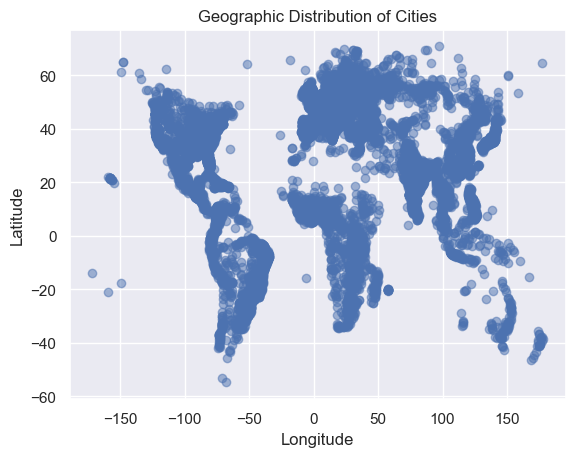

In [203]:
plt.scatter(AQI_data['lng'], AQI_data['lat'], alpha=0.5)
plt.title('Geographic Distribution of Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Insights:
* The plot shows cities distributed across the globe, indicating their varying geographical locations, with clustering likely in populated areas.
* The alpha transparency helps visualize point density, showing areas with more cities (such as urban centers) and regions with fewer cities.

# 3.4. Top Ten highest & Lowest average AQI values of Countries and City And Its visualization

In [249]:
num=AQI_data['Country'].value_counts().sort_values(ascending=True)

In [251]:
avg_aqi_country = AQI_data.groupby('Country')["AQI Value"].mean().round(2).reset_index()

In [253]:
avg_aqi_country

Country  AQI Value
0                           Afghanistan      86.33
1                               Albania      77.11
2                               Algeria     106.25
3                               Andorra      32.00
4                                Angola      85.00
..                                  ...        ...
169  Venezuela (Bolivarian Republic of)      82.65
170                            Viet Nam      88.57
171                               Yemen     131.00
172                              Zambia      41.75
173                            Zimbabwe      46.86

[174 rows x 2 columns]

                  Country  AQI Value
126     Republic of Korea     421.00
11                Bahrain     188.00
116              Pakistan     184.20
134          Saudi Arabia     168.00
125                 Qatar     164.00
98             Mauritania     164.00
163  United Arab Emirates     163.67
7                   Aruba     163.00
82                 Kuwait     161.00
115                  Oman     155.00


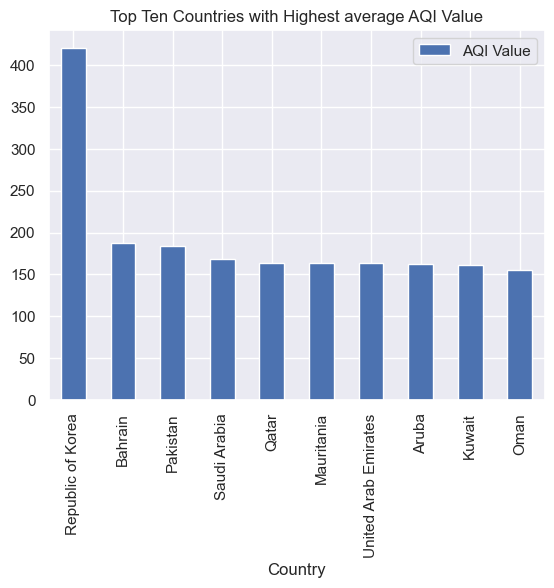

In [255]:
topten_polluted_countries = avg_aqi_country.sort_values("AQI Value", ascending = False).head(10)
print(topten_polluted_countries)
fig1 = topten_polluted_countries.plot.bar(x = "Country", title = "Top Ten Countries with Highest average AQI Value")

# Observations:
* Among the countries analyzed in this dataset, the Republic of Korea stands out with one of the highest average AQI values.
* Data reveals that a significant portion of the countries with high AQI values listed are from the Middle East.
* This region, characterized by extensive deserts,is often impacted by dust storms, which have been linked to air quality challenges.

                              Country  AQI Value
117                             Palau      16.00
142                   Solomon Islands      18.00
95                           Maldives      19.00
68                            Iceland      23.00
119                  Papua New Guinea      24.73
19   Bolivia (Plurinational State of)      25.49
167                           Uruguay      26.00
137                        Seychelles      26.00
18                             Bhutan      26.00
91                         Luxembourg      26.00


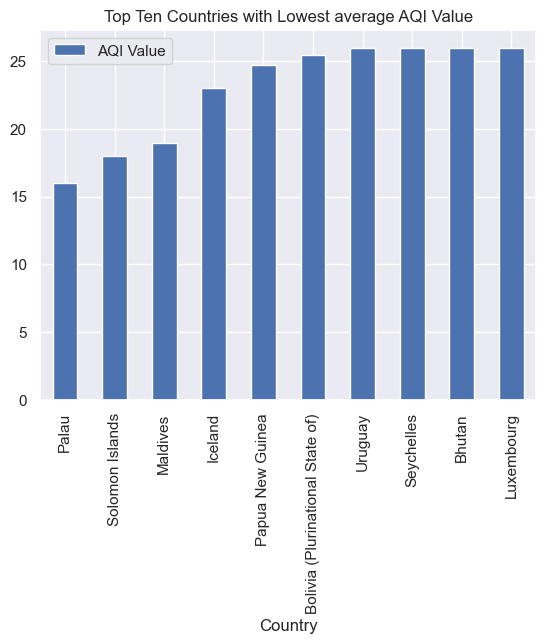

In [257]:

topten_clean_countries = avg_aqi_country.sort_values("AQI Value", ascending = True).head(10)
print(topten_clean_countries)
fig2 = topten_clean_countries.plot.bar(x = "Country", y = "AQI Value", title = "Top Ten Countries with Lowest average AQI Value")

# Observations:
The island nation of Palau ranks among the countries with the lowest average AQI values in this dataset, suggesting relatively clean air quality.

In [262]:

avg_aqi_city = AQI_data.groupby("City")["AQI Value"].mean().round(2).reset_index()

In [264]:
avg_aqi_city

City  AQI Value
0         Aabenraa       45.0
1           Aachen       55.0
2          Aalborg       46.0
3            Aalen       61.0
4         Aalsmeer       38.0
...            ...        ...
13951      Zwickau       32.0
13952      Zwiesel       69.0
13953  Zwijndrecht       39.0
13954       Zwolle       31.0
13955   Zyryanovsk       24.0

[13956 rows x 2 columns]

           City  AQI Value
5588    Jodhpur      500.0
1555   Boksburg      500.0
7615       Maur      500.0
5478  Jalalabad      500.0
3213   Dhanaura      500.0
4756  Harunabad      500.0
4759   Hasanpur      500.0
3757       Etah      500.0
7300     Malaut      500.0
3151      Delhi      500.0


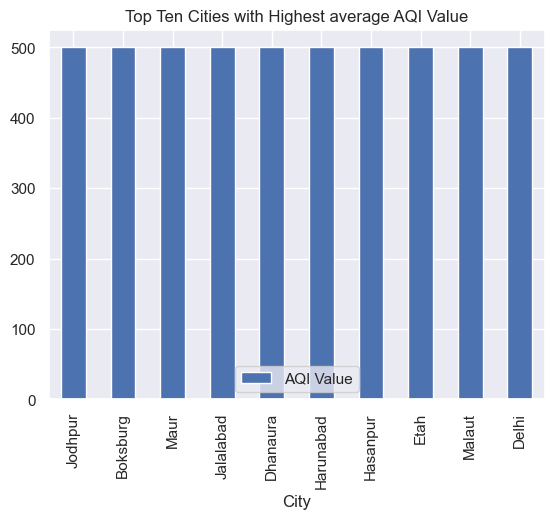

In [266]:
topten_polluted_cities = avg_aqi_city.sort_values("AQI Value", ascending = False).head(10)
print(topten_polluted_cities)
fig3 = topten_polluted_cities.plot.bar(x = "City", title = "Top Ten Cities with Highest average AQI Value")

 # Insights:
Common factor between them is that they are all situated in areas with high population densities, industrial activities, and vehicle traffic, which contribute to poor air quality. As a result, they all have high AQI (Air Quality Index) values, indicating unsafe levels of air pollution.poor air quality. 

                City  AQI Value
7181           Macas        7.0
785          Azogues        8.0
12105           Tari        8.0
5105          Huaraz        9.0
7397       Manokwari       10.0
5096    Huancavelica       10.0
8862      Nueva Loja       10.0
5093      Huamachuco       11.0
7714           Mendi       11.0
10010  Puerto Madryn       11.0


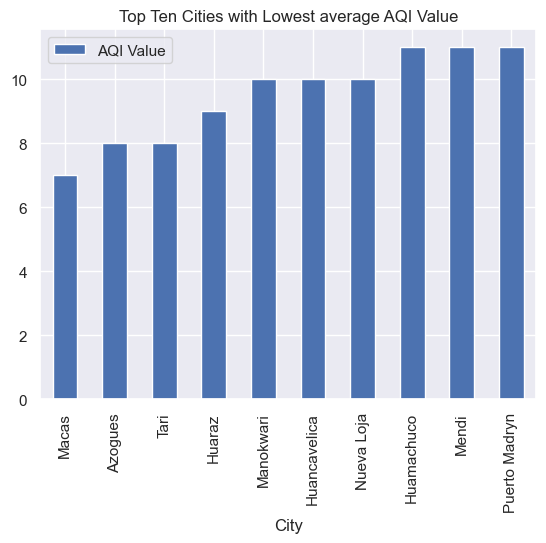

In [268]:

topten_clean_cities = avg_aqi_city.sort_values("AQI Value", ascending = True).head(10)
print(topten_clean_cities)
fig4 = topten_clean_cities.plot.bar(x = "City", title = "Top Ten Cities with Lowest average AQI Value")

# Insights:
* Despite their differences in location and climate, they share a common trait of having low AQI values due to their relatively low levels of industrial activity, vehicle emissions, and population density.
* As a result, they tend to have cleaner air and lower levels of air pollution compared to major urban centers

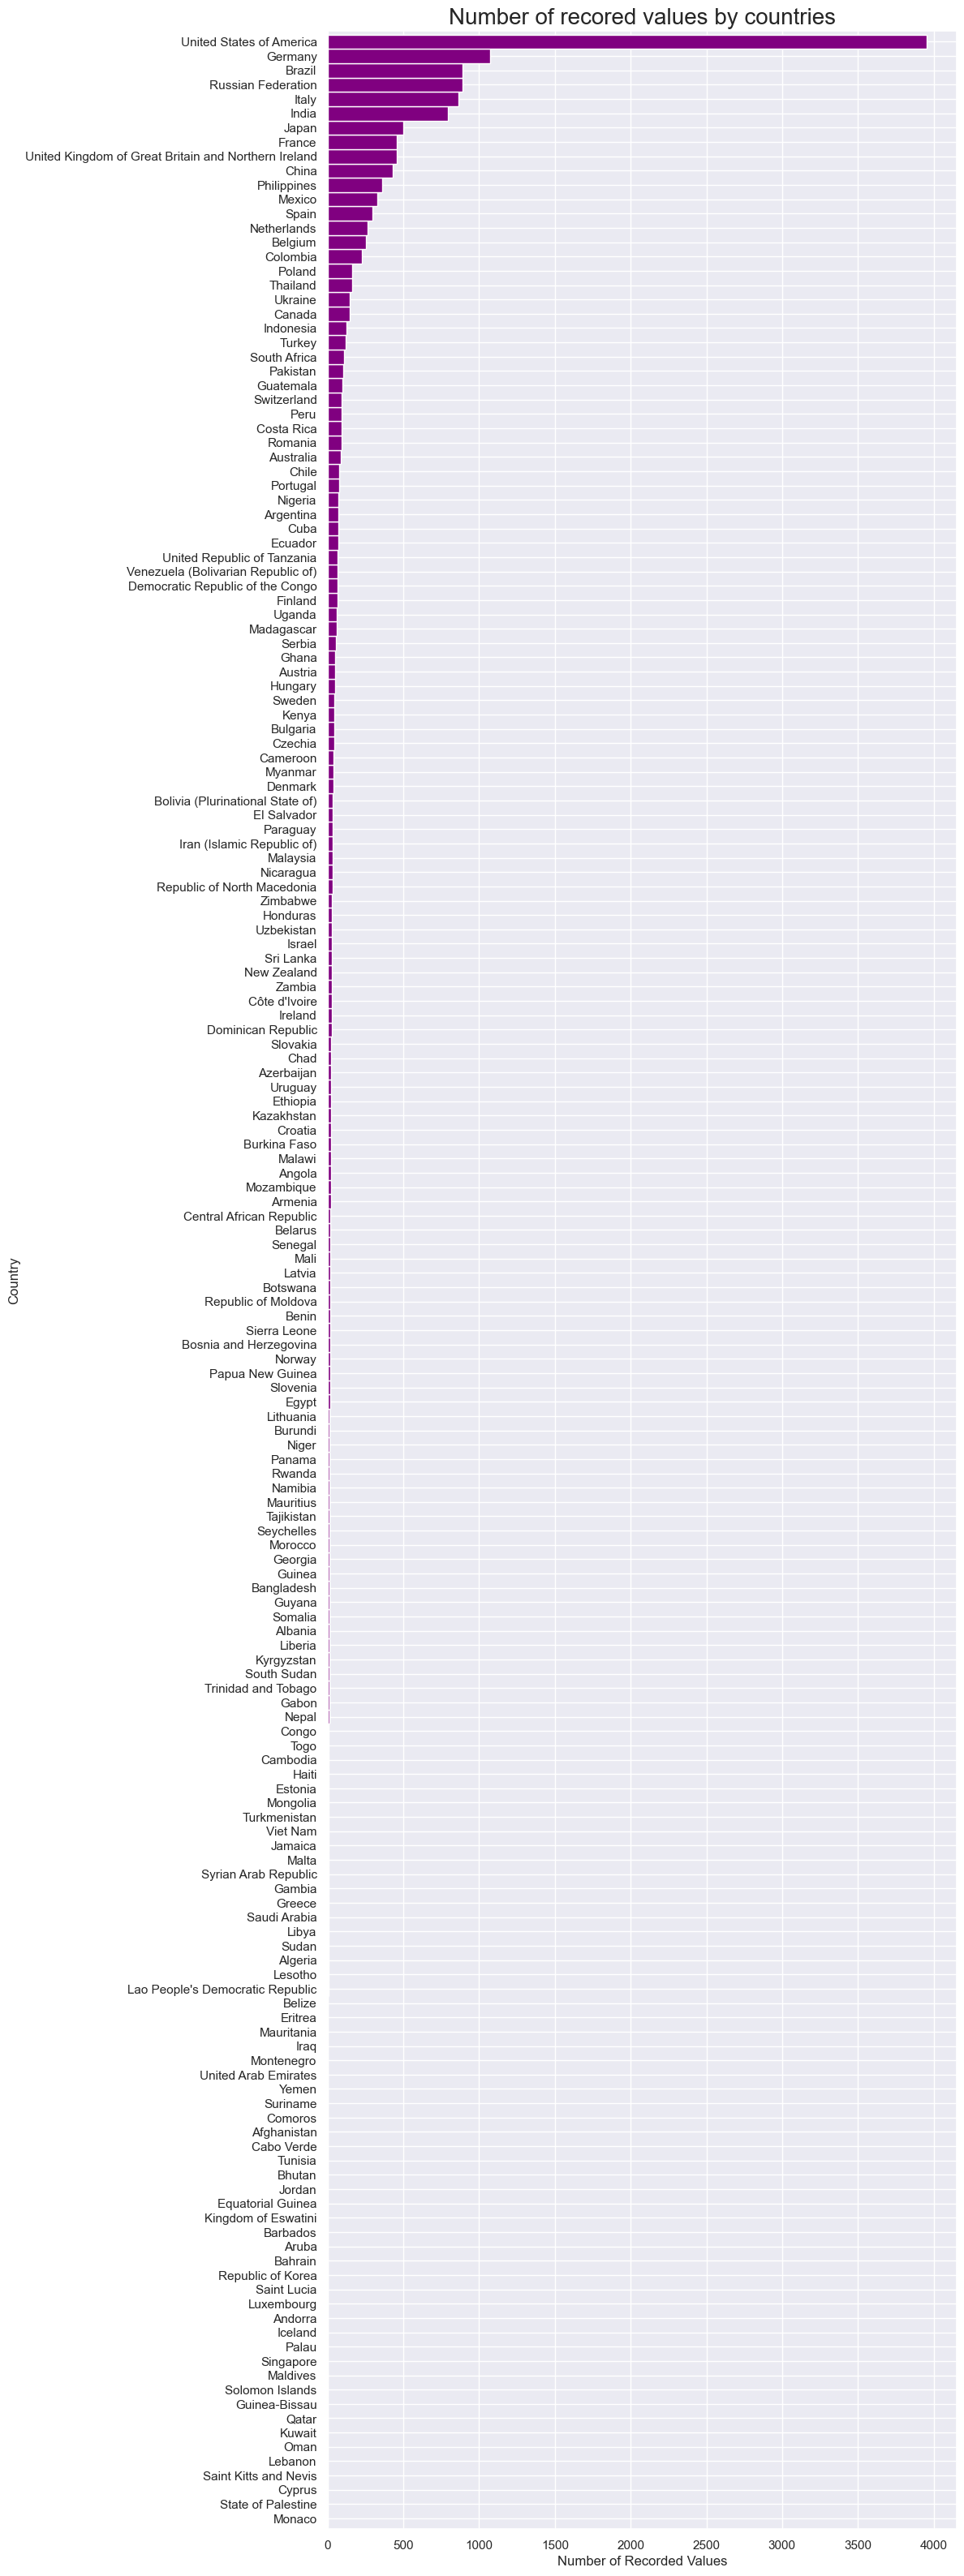

In [270]:
num.plot.barh(figsize=(10,40), color='purple', width=1)
plt.title("Number of recored values by countries", fontsize=20)
plt.xlabel('Number of Recorded Values', fontsize=12)
plt.show()

# Insights:
* The horizontal bar plot shows the number of recorded values for each country. The plot allows you to infer which countries have more data points or records available, indicating regions with better data coverage or higher activity.
* Countries with lower recorded values might need additional data collection efforts, especially if they are regions of interest in studies related to air quality, health, or other monitored variables. 
* On the other hand, countries with high numbers of recorded values could indicate areas that are more actively studied or have greater environmental concerns.

# 3.5.Country & City with AQI Value

In [272]:
AQI_data[['Country', 'City', 'AQI Value']].nlargest(10,'AQI Value')

Country          City  AQI Value
203                   Pakistan  Bahawalnagar        500
445                   Pakistan     Harunabad        500
578                      India  Mahendragarh        500
1623                     India       Phalodi        500
1808                     India       Jodhpur        500
3750                     India         Delhi        500
3751                     India         Delhi        500
3768  United States of America       Durango        500
3769  United States of America       Durango        500
3770  United States of America       Durango        500

In [278]:
AQI_data[['Country', 'City', 'AQI Value',]].nsmallest(10,'AQI Value')

Country                City  AQI Value
6610            Ecuador               Macas          7
10496           Ecuador             Azogues          8
16559  Papua New Guinea                Tari          8
5451               Peru              Huaraz          9
2615            Ecuador          Nueva Loja         10
5654               Peru        Huancavelica         10
6884          Indonesia           Manokwari         10
3585               Peru              Puquio         11
4051          Argentina  Comodoro Rivadavia         11
6832   Papua New Guinea               Mendi         11

# Interpretation:
* The provided data indicates that several cities across different countries, including Pakistan, India, and the United States, have recorded the highest possible Air Quality Index (AQI) value of 500 whereas Cities like Macas (Ecuador), Azogues (Ecuador), and Tari (Papua New Guinea) have exceptionally low AQI values, ranging from 7 to 8, indicating good air quality conditions. 

# 3.6.High & Low AQI Cities

In [282]:
aqi_avg = AQI_data.groupby('City')['AQI Value'].mean().reset_index()
highaqi_city = aqi_avg.sort_values('AQI Value', ascending=False)

print(highaqi_city.head(10))

           City  AQI Value
5588    Jodhpur      500.0
1555   Boksburg      500.0
7615       Maur      500.0
5478  Jalalabad      500.0
3213   Dhanaura      500.0
4756  Harunabad      500.0
4759   Hasanpur      500.0
3757       Etah      500.0
7300     Malaut      500.0
3151      Delhi      500.0


# Insights:
* Jalalabad and Maur is a city in Pakistan that tops the list with the highest AQI value.
* Interestingly 7 of those cities listed are in India.  
* There are two other cities that are in Pakistan beside India and one city from the Boksburg (South Africa)
* The cities listed, including Jodhpur, Boksburg, and Maur, all have an AQI value of 500, which is the highest possible AQI value, indicating hazardous air quality.
*  These cities are experiencing severe air pollution, which can pose significant health risks to residents.

In [286]:
aqi_avg = AQI_data.groupby('City')['AQI Value'].mean().reset_index()
lowaqi_city = aqi_avg.sort_values('AQI Value', ascending=True)

print(lowaqi_city.head(10))

                City  AQI Value
7181           Macas        7.0
785          Azogues        8.0
12105           Tari        8.0
5105          Huaraz        9.0
7397       Manokwari       10.0
5096    Huancavelica       10.0
8862      Nueva Loja       10.0
5093      Huamachuco       11.0
7714           Mendi       11.0
10010  Puerto Madryn       11.0


# Insights:
* The cities with the lowest AQI values are spread across different continents and regions. For instance, Macas (Ecuador), Azogues (Ecuador), and Tari (Indonesia) indicate that areas in South America and Southeast Asia can have low air pollution.
* Many of the cities listed, like Macas, Azogues, and Huancavelica, are relatively smaller towns or cities compared to major metropolitan areas

# 3.7.Cleanest  Countries

In [291]:
# Create Clean DataFrame with specific conditions
Clean = AQI_data[
    (AQI_data['CO AQI Category'] == 0) & 
    (AQI_data['Ozone AQI Category'] == 0) & 
    (AQI_data['NO2 AQI Category'] == 0) & 
    (AQI_data['PM2.5 AQI Category'] == 0)
]

<Axes: title={'center': 'Cleanest Countries'}, ylabel='Country'>

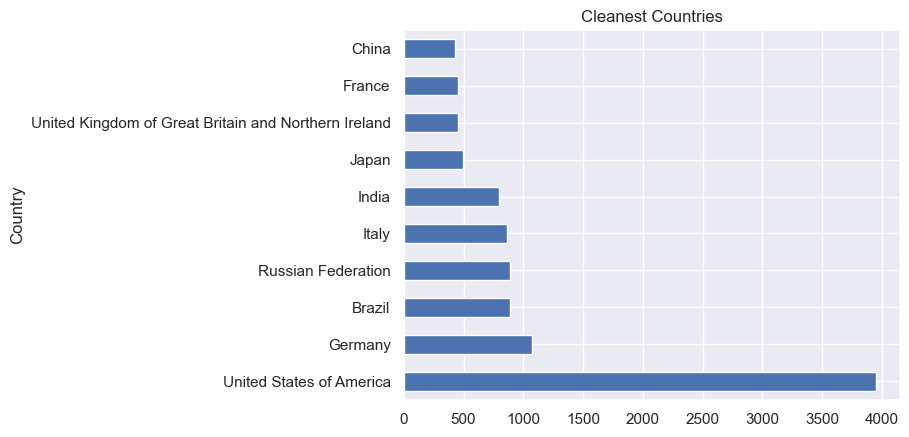

In [299]:
# Create Clean DataFrame without filtering conditions, just checking for non-null 'Country'
Clean = AQI_data[AQI_data['Country'].notna()]

# Plot top 10 countries by count
Clean['Country'].value_counts(ascending=False).head(10).plot(kind='barh', title='Cleanest Countries')


# Insights:
* From this, we found that the US, had the most cities that fit the criteria set earlier. Russia, Brazil, Germany, and 
the United Kingdom followed after with high counts of different cities having a 'Good'classification of AQI.

# 4.Machine Learning Models

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 4.1. One hot encoding for categorical columns

In [7]:
# Automatically separate categorical and numerical columns
categorical_columns = AQI_data.select_dtypes(include=['object']).columns.tolist()  # Select columns with object data type
numerical_columns = AQI_data.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Select columns with numerical data types
df_encoded = pd.get_dummies(AQI_data[categorical_columns])

It then applies one-hot encoding (pd.get_dummies) to the categorical columns, transforming them into numerical representations, which are useful for machine learning models.

# 4.2.Splitting Target and Features

In [9]:
X = pd.concat([AQI_data[numerical_columns], df_encoded], axis=1)
y = AQI_data['AQI Category']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.3. Decision Tree Classifier

In [655]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [661]:
#predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:1.00
Confusion Matrix:
 [[1569    0    0    0    0    0]
 [   0    9    0    0    0    0]
 [   0    0 1431    0    0    0]
 [   0    0    0  158    0    0]
 [   0    0    0    0  147    0]
 [   0    0    0    0    0   25]]


1.0

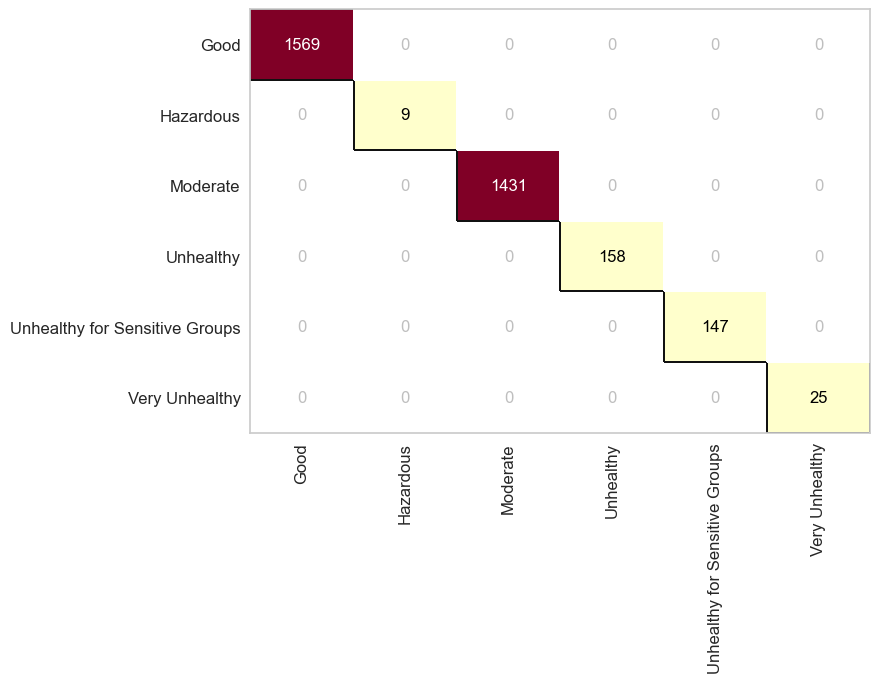

In [663]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(clf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [671]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      1569
                     Hazardous       1.00      1.00      1.00         9
                      Moderate       0.99      1.00      1.00      1431
                     Unhealthy       0.99      0.97      0.98       158
Unhealthy for Sensitive Groups       0.99      0.97      0.98       147
                Very Unhealthy       1.00      0.80      0.89        25

                      accuracy                           0.99      3339
                     macro avg       1.00      0.96      0.97      3339
                  weighted avg       0.99      0.99      0.99      3339



# 4.4. Random Forest Classifier 

In [13]:

rf_classifier = RandomForestClassifier(n_estimators=2, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2, random_state=42)

In [667]:
#predict and evaluate
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:0.99
Confusion Matrix:
 [[1569    0    0    0    0    0]
 [   0    9    0    0    0    0]
 [   4    0 1427    0    0    0]
 [   0    0    4  154    0    0]
 [   1    0    3    0  143    0]
 [   0    0    2    1    2   20]]


In [676]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      1569
                     Hazardous       1.00      1.00      1.00         9
                      Moderate       0.99      1.00      1.00      1431
                     Unhealthy       0.99      0.97      0.98       158
Unhealthy for Sensitive Groups       0.99      0.97      0.98       147
                Very Unhealthy       1.00      0.80      0.89        25

                      accuracy                           0.99      3339
                     macro avg       1.00      0.96      0.97      3339
                  weighted avg       0.99      0.99      0.99      3339



# 4.5.SVM classifier

In [673]:

model = SVC(kernel='linear')

In [675]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [679]:
# Predictions
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9994010182689428


In [683]:
 # Standardize/scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4.6.KNN Classifier

In [695]:

k = 6
knn = KNeighborsClassifier(n_neighbors=k)

In [697]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=6)

In [699]:
# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

In [700]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")

KNN Accuracy: 0.46


In [703]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
                                precision    recall  f1-score   support

                          Good       0.98      0.06      0.11      1569
                     Hazardous       0.00      0.00      0.00         9
                      Moderate       0.44      1.00      0.61      1431
                     Unhealthy       1.00      0.05      0.10       158
Unhealthy for Sensitive Groups       0.88      0.05      0.09       147
                Very Unhealthy       0.00      0.00      0.00        25

                      accuracy                           0.46      3339
                     macro avg       0.55      0.19      0.15      3339
                  weighted avg       0.73      0.46      0.32      3339



# 4.7.Annotate the best model

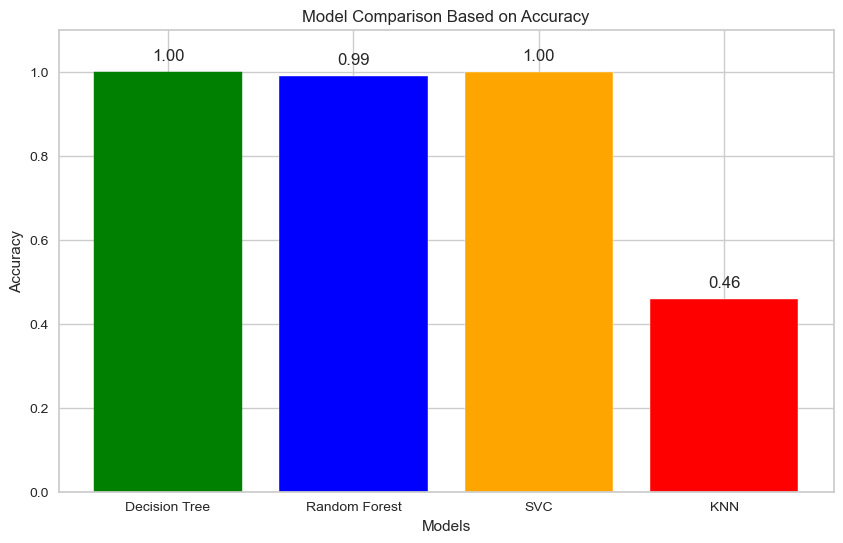

In [725]:
model_names = ['Decision Tree', 'Random Forest', 'SVC', 'KNN']
accuracies = [1.0, 0.99, 0.9994, 0.46]  # Replace with actual accuracy values
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['green', 'blue', 'orange', 'red'])
best_model_idx = np.argmax(accuracies)
bars[best_model_idx].set_color('green')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison Based on Accuracy')
plt.ylim(0, 1.1)  # Set y-axis limit to 1.1 to clearly show the scale
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()


# Conclusions:
* Global Air Quality Concerns: Air quality remains a major environmental and public health issue globally, with many regions, especially urban and industrial areas, experiencing high levels of pollution that affect human health and the environment.
* Widespread Impact: The World Air Quality Index (AQI) highlights that countries such as India, Pakistan, and parts of Africa face significant air quality challenges, with some cities having AQI values in the hazardous range (500), indicating severe pollution.